In [4]:
import pandas as pd

airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

chunksize = 10 ** 6
flights_new = 'flights_all.csv'
first_chunk = True #чтобы записать заголовки только один раз

for chunk in pd.read_csv('flights.csv', dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, chunksize=chunksize): #принудительно читаем столбцы как строки

    #объединяем данные
    flights_airports_chunk = pd.merge(chunk, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left') 
    flights_all_chunk = pd.merge(flights_airports_chunk, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')


    flights_all_chunk.to_csv(flights_new, mode='a', header=first_chunk, index=False) #добавляем chunk в конец файла
    first_chunk = False

    print(f"Чанк записан в файл {flights_new}.")

print("Все данные записаны в файл.")


Чанк записан в файл flights_all.csv.
Чанк записан в файл flights_all.csv.
Чанк записан в файл flights_all.csv.
Чанк записан в файл flights_all.csv.
Чанк записан в файл flights_all.csv.
Чанк записан в файл flights_all.csv.
Все данные записаны в файл.


In [5]:
flights_df = pd.read_csv(flights_new, dtype={'YEAR': int, 'MONTH': int, 'DAY': int, 'DAY_OF_WEEK': int, 'AIRLINE_x': str, 'FLIGHT_NUMBER': int, 'TAIL_NUMBER': str, 'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str, 'SCHEDULED_DEPARTURE': int, 'WEATHER_DELAY': str, 'IATA_CODE_x': str, 'AIRPORT': str, 'CITY': str, 'STATE': str, 'COUNTRY': str, 'LATITUDE': float, 'LONGITUDE': float, 'IATA_CODE_y': str, 'AIRLINE_y ': str})
print(f"Последние 5 строк:\n{flights_df.tail()}")

Последние 5 строк:
         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x  FLIGHT_NUMBER TAIL_NUMBER  \
5819074  2015     12   31            4        B6            688      N657JB   
5819075  2015     12   31            4        B6            745      N828JB   
5819076  2015     12   31            4        B6           1503      N913JB   
5819077  2015     12   31            4        B6            333      N527JB   
5819078  2015     12   31            4        B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         WEATHER_DELAY  IATA_CODE_x  \
5819074            NaN          LA

In [6]:
print(f"Первые 5 строк:\n{flights_df.head()}")

Первые 5 строк:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4        AS             98      N407AS   
1  2015      1    1            4        AA           2336      N3KUAA   
2  2015      1    1            4        US            840      N171US   
3  2015      1    1            4        AA            258      N3HYAA   
4  2015      1    1            4        AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  WEATHER_DELAY  \
0            ANC                 SEA                    5  ...            NaN   
1            LAX                 PBI                   10  ...            NaN   
2            SFO                 CLT                   20  ...            NaN   
3            LAX                 MIA                   20  ...            NaN   
4            SEA                 ANC                   25  ...            NaN   

   IATA_CODE_x                                      AIRPOR

In [17]:
print(f"Основная информация:\n{flights_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 40 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
print(f"Статистика для DataFrame:\n{flights_df.describe()}")

Статистика для DataFrame:
            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.

In [18]:
print(f"Количество строк и столбцов:\n{flights_df.shape}")

Количество строк и столбцов:
(5819079, 40)


In [7]:
#подсчет пропущенных значений с сортировкой по убыванию
missing_counts = flights_df.isnull().sum().sort_values(ascending=False)
print("Количество пустых значений по колонкам:")
print(missing_counts)

Количество пустых значений по колонкам:
CANCELLATION_REASON    5729195
SECURITY_DELAY         4755640
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
AIRLINE_DELAY          4755640
AIR_SYSTEM_DELAY       4755640
LATITUDE                490770
LONGITUDE               490770
CITY                    486165
AIRPORT                 486165
IATA_CODE_x             486165
STATE                   486165
COUNTRY                 486165
ELAPSED_TIME            105071
ARRIVAL_DELAY           105071
AIR_TIME                105071
TAXI_IN                  92513
WHEELS_ON                92513
ARRIVAL_TIME             92513
WHEELS_OFF               89047
TAXI_OUT                 89047
DEPARTURE_DELAY          86153
DEPARTURE_TIME           86153
TAIL_NUMBER              14721
SCHEDULED_TIME               6
ORIGIN_AIRPORT               0
AIRLINE_x                    0
FLIGHT_NUMBER                0
MONTH                        0
DAY                          0
YEAR                         0

In [8]:
# процент пустых значений по убыванию
missing_percentage = (flights_df.isnull().mean() * 100).sort_values(ascending=False)
print("\nПроцент пустых значений по колонкам:")
print(missing_percentage)


Процент пустых значений по колонкам:
CANCELLATION_REASON    98.455357
SECURITY_DELAY         81.724960
WEATHER_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
AIRLINE_DELAY          81.724960
AIR_SYSTEM_DELAY       81.724960
LATITUDE                8.433809
LONGITUDE               8.433809
CITY                    8.354673
AIRPORT                 8.354673
IATA_CODE_x             8.354673
STATE                   8.354673
COUNTRY                 8.354673
ELAPSED_TIME            1.805629
ARRIVAL_DELAY           1.805629
AIR_TIME                1.805629
TAXI_IN                 1.589822
WHEELS_ON               1.589822
ARRIVAL_TIME            1.589822
WHEELS_OFF              1.530259
TAXI_OUT                1.530259
DEPARTURE_DELAY         1.480526
DEPARTURE_TIME          1.480526
TAIL_NUMBER             0.252978
SCHEDULED_TIME          0.000103
ORIGIN_AIRPORT          0.000000
AIRLINE_x               0.000000
FLIGHT_NUMBER           0.000000
MONTH                   0.000000
DAY  

In [ ]:
#в столбце CANCELLATION_REASON указываются причины отмены рейса. Для неотмененных рейсов причины отмены не может быть, поэтому значение будет пустым.
#в колонках SECURITY_DELAY, WEATHER_DELAY, LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, AIR_SYSTEM_DELAY указываются конкретные причины задержки. 
#Данные распределяются по всем этим столбцам, поэтому возникает большое количество пропусков.

In [11]:
#создаем список названий столбцов, где процент пропущенных значений больше 80
columns_to_drop = missing_percentage[missing_percentage > 80].index

# удаляем эти столбцы
flights_df_cleaned = flights_df.drop(columns=columns_to_drop)

print(f"Удалены столбцы с более чем 80% пропущенных значений:\n{list(columns_to_drop)}")
print(f"Новая форма DataFrame: {flights_df_cleaned.shape}")

Удалены столбцы с более чем 80% пропущенных значений:
['CANCELLATION_REASON', 'SECURITY_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY']
Новая форма DataFrame: (5819079, 34)


In [10]:
#количество строк до удаления дубликатов
rows_before = flights_df_cleaned.shape[0]

#удаление дубликатов
flights_df_cleaned = flights_df_cleaned.drop_duplicates()

#количество строк после удаления
rows_after = flights_df_cleaned.shape[0]

#кол-во найденных дубликатов
duplicates_found = rows_before - rows_after

print(f"Количество строк до удаления дубликатов: {rows_before}")
print(f"Количество строк после удаления дубликатов: {rows_after}")
print(f"Количество найденных дубликатов: {duplicates_found}")

Количество строк до удаления дубликатов: 5819079
Количество строк после удаления дубликатов: 5819079
Количество найденных дубликатов: 0


In [12]:
#числовые столбцы
numerical_columns = ['ELAPSED_TIME', 'ARRIVAL_DELAY', 'AIR_TIME', 'TAXI_IN', 
                     'WHEELS_ON', 'ARRIVAL_TIME', 'WHEELS_OFF', 'TAXI_OUT', 
                     'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'SCHEDULED_TIME']

for column in numerical_columns:
    if flights_df_cleaned[column].isnull().sum() > 0: #проверяем есть ли пустые значения
        median_value = flights_df_cleaned[column].median() #вычисляем медиану
        flights_df_cleaned[column] = flights_df_cleaned[column].fillna(median_value) #заполняем пропуски медианой

#категориальные столбцы
categorical_columns = ['LATITUDE', 'LONGITUDE', 'CITY', 'AIRPORT', 'IATA_CODE_x', 
                       'STATE', 'COUNTRY', 'TAIL_NUMBER']

for column in categorical_columns:
    if flights_df_cleaned[column].isnull().sum() > 0:
        if flights_df_cleaned[column].dtype == 'object': #если тип данных object, то заполняем пропуски 'Unknown'
            flights_df_cleaned[column] = flights_df_cleaned[column].fillna('Unknown')
        else:
           
            flights_df_cleaned[column] = flights_df_cleaned[column].fillna(0) #если нет, то заполняем 0

print("Пропущенные значения заполнены.")

Пропущенные значения заполнены.


In [13]:
cancel_counts = flights_df_cleaned['CANCELLED'].value_counts()
print("Количество отменённых и неотменённых рейсов:")
print(cancel_counts)

Количество отменённых и неотменённых рейсов:
CANCELLED
0    5729195
1      89884
Name: count, dtype: int64


In [14]:
cancel_percent = flights_df_cleaned['CANCELLED'].value_counts(normalize=True) * 100
print("\nПроцент отменённых и неотменённых рейсов:")
print(cancel_percent.round(2))


Процент отменённых и неотменённых рейсов:
CANCELLED
0    98.46
1     1.54
Name: proportion, dtype: float64


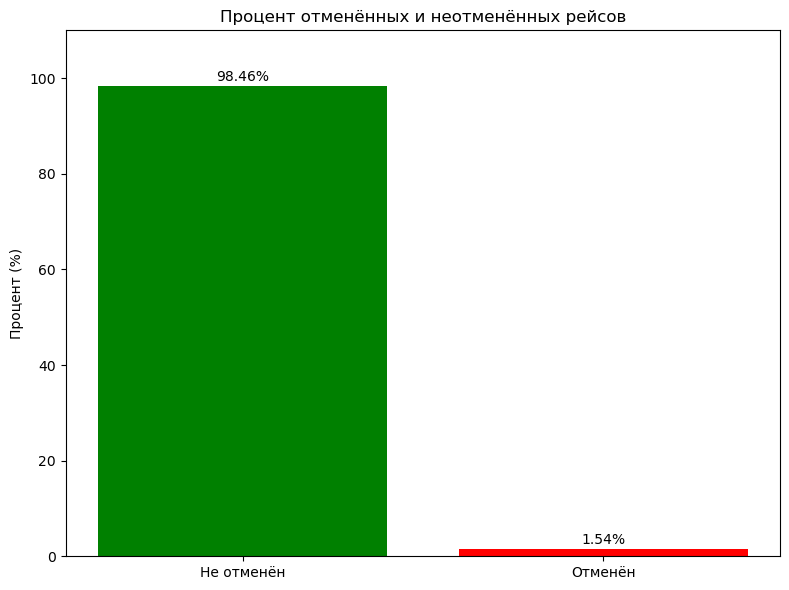

In [15]:
#график для отмененных и неотмененных рейсов
import matplotlib.pyplot as plt

labels = ['Не отменён', 'Отменён']

values = cancel_percent.sort_index()  # 0 — не отменён, 1 — отменён

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Процент отменённых и неотменённых рейсов')
plt.ylabel('Процент (%)')
plt.ylim(0, 110)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()


In [16]:
cancel_by_airport = flights_df_cleaned[flights_df_cleaned['CANCELLED'] == 1]
cancel_counts_airport = cancel_by_airport.groupby('AIRPORT').size().sort_values(ascending=False)
print("Топ 10 аэропортов с наибольшим количеством отменённых рейсов:")
print(cancel_counts_airport.head(10))

Топ 10 аэропортов с наибольшим количеством отменённых рейсов:
AIRPORT
Chicago O'Hare International Airport                8548
Dallas/Fort Worth International Airport             6254
LaGuardia Airport (Marine Air Terminal)             4531
Newark Liberty International Airport                3110
Gen. Edward Lawrence Logan International Airport    2654
Hartsfield-Jackson Atlanta International Airport    2557
Unknown                                             2454
Los Angeles International Airport                   2164
San Francisco International Airport                 2148
George Bush Intercontinental Airport                2130
dtype: int64


In [17]:
worst_airport = cancel_counts_airport.idxmax()
worst_count = cancel_counts_airport.max()
print(f"\nАэропорт с наибольшим количеством отменённых рейсов: {worst_airport} ({worst_count} отмен)")


Аэропорт с наибольшим количеством отменённых рейсов: Chicago O'Hare International Airport (8548 отмен)


Топ 10 аэропортов по числу отменённых рейсов:
AIRPORT
Chicago O'Hare International Airport                8548
Dallas/Fort Worth International Airport             6254
LaGuardia Airport (Marine Air Terminal)             4531
Newark Liberty International Airport                3110
Gen. Edward Lawrence Logan International Airport    2654
Hartsfield-Jackson Atlanta International Airport    2557
Unknown                                             2454
Los Angeles International Airport                   2164
San Francisco International Airport                 2148
George Bush Intercontinental Airport                2130
Name: count, dtype: int64


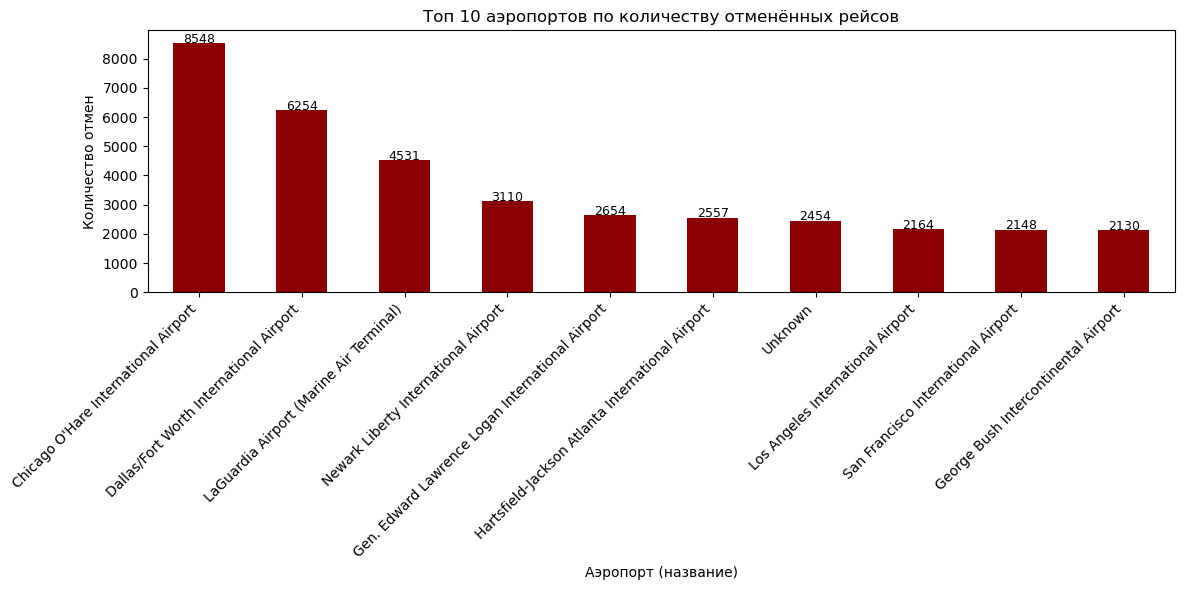

In [18]:
#фильтруем только отменённые рейсы
cancelled_flights = flights_df_cleaned[flights_df_cleaned['CANCELLED'] == 1]

#считаем количество отмен по названию аэропорта
cancel_counts_by_airport_name = cancelled_flights['AIRPORT'].value_counts().sort_values(ascending=False)

#10 аэропортов по количеству отмен
top10_airports = cancel_counts_by_airport_name.head(10)
print("Топ 10 аэропортов по числу отменённых рейсов:")
print(top10_airports)

plt.figure(figsize=(12, 6))
top10_airports.plot(kind='bar', color='darkred')

plt.title('Топ 10 аэропортов по количеству отменённых рейсов')
plt.xlabel('Аэропорт (название)')
plt.ylabel('Количество отмен')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top10_airports):
    plt.text(i, value + 5, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import pearsonr, spearmanr

#коэффициент корреляции Пирсона и Спирмена для дня недели
pearson_day, pval_day_pearson = pearsonr(flights_df_cleaned['CANCELLED'], flights_df_cleaned['DAY_OF_WEEK'])
spearman_day, pval_day_spearman = spearmanr(flights_df_cleaned['CANCELLED'], flights_df_cleaned['DAY_OF_WEEK'])

#коэффициент корреляции Пирсона и Спирмена для месяца
pearson_month, pval_month_pearson = pearsonr(flights_df_cleaned['CANCELLED'], flights_df_cleaned['MONTH'])
spearman_month, pval_month_spearman = spearmanr(flights_df_cleaned['CANCELLED'], flights_df_cleaned['MONTH'])

print("КОРРЕЛЯЦИЯ С ДНЁМ НЕДЕЛИ:")
print(f"  Пирсон: {pearson_day:.4f}, p-value: {pval_day_pearson:.4g}")
print(f"  Спирмен: {spearman_day:.4f}, p-value: {pval_day_spearman:.4g}")

print("\nКОРРЕЛЯЦИЯ С МЕСЯЦЕМ:")
print(f"  Пирсон: {pearson_month:.4f}, p-value: {pval_month_pearson:.4g}")
print(f"  Спирмен: {spearman_month:.4f}, p-value: {pval_month_spearman:.4g}")


КОРРЕЛЯЦИЯ С ДНЁМ НЕДЕЛИ:
  Пирсон: -0.0222, p-value: 0
  Спирмен: -0.0228, p-value: 0

КОРРЕЛЯЦИЯ С МЕСЯЦЕМ:
  Пирсон: -0.0550, p-value: 0
  Спирмен: -0.0551, p-value: 0


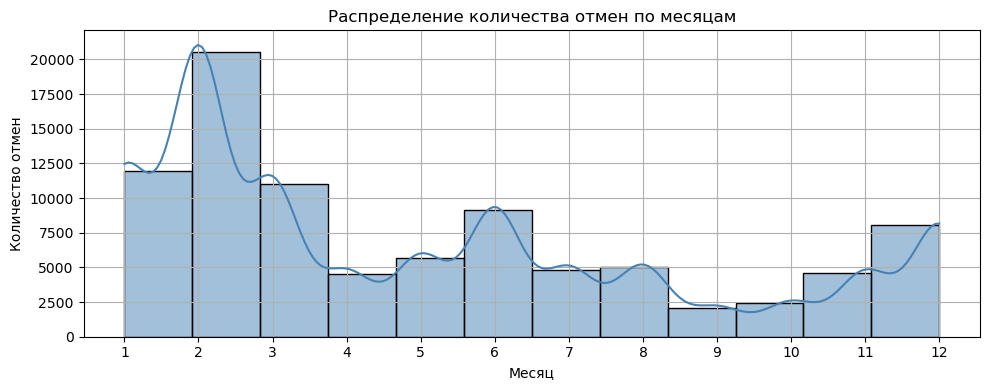

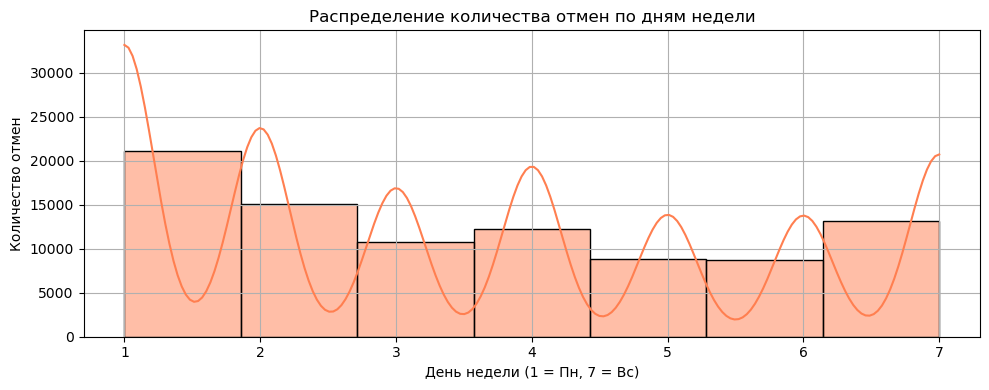

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#только отменённые рейсы
cancelled = flights_df_cleaned[flights_df_cleaned['CANCELLED'] == 1]

# гистограмма отмен по месяцам
plt.figure(figsize=(10, 4))
sns.histplot(cancelled['MONTH'], bins=12, kde=True, color='steelblue')
plt.title('Распределение количества отмен по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество отмен')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

#гистограмма отмен по дням недели
plt.figure(figsize=(10, 4))
sns.histplot(cancelled['DAY_OF_WEEK'], bins=7, kde=True, color='coral')
plt.title('Распределение количества отмен по дням недели')
plt.xlabel('День недели (1 = Пн, 7 = Вс)')
plt.ylabel('Количество отмен')
plt.xticks(range(1, 8))
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
selected_airlines = ['American Airlines Inc.', 'Frontier Airlines Inc.', 'Skywest Airlines Inc.']

#для статистики по каждой компании
summary = []

for airline in selected_airlines:
    df = flights_df_cleaned[flights_df_cleaned['AIRLINE_y'] == airline]
    total = len(df)
    cancelled = df['CANCELLED'].sum()
    diverted = df['DIVERTED'].sum()
    normal = total - cancelled - diverted
    
    summary.append({
        'Airline': airline,
        'Normal': normal,
        'Cancelled': cancelled,
        'Diverted': diverted
    })


airline_stats = pd.DataFrame(summary)
print("Статистика по авиакомпаниям:")
print(airline_stats)

Статистика по авиакомпаниям:
                  Airline  Normal  Cancelled  Diverted
0  American Airlines Inc.  712935      10919      2130
1  Frontier Airlines Inc.   90090        588       158
2   Skywest Airlines Inc.  576814       9960      1579


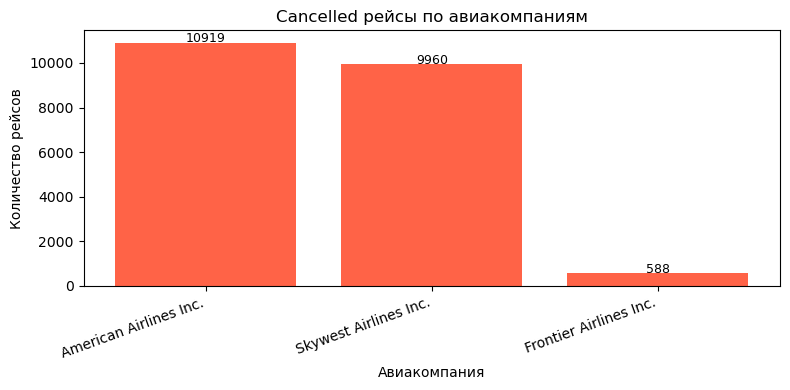

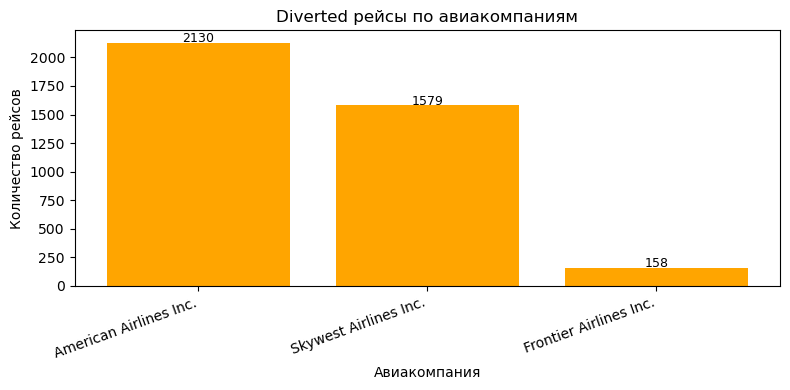

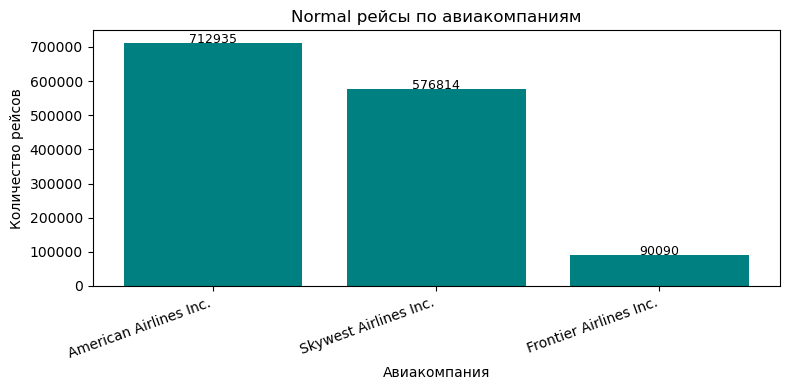

In [23]:
#гистограммы по каждой категории
categories = ['Cancelled', 'Diverted', 'Normal']
colors = {'Cancelled': 'tomato', 'Diverted': 'orange', 'Normal': 'teal'}

for cat in categories:
    sorted_df = airline_stats.sort_values(by=cat, ascending=False)
    
    plt.figure(figsize=(8, 4))
    bars = plt.bar(sorted_df['Airline'], sorted_df[cat], color=colors[cat])
    
    plt.title(f'{cat} рейсы по авиакомпаниям')
    plt.xlabel('Авиакомпания')
    plt.ylabel('Количество рейсов')
    plt.xticks(rotation=20, ha='right')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


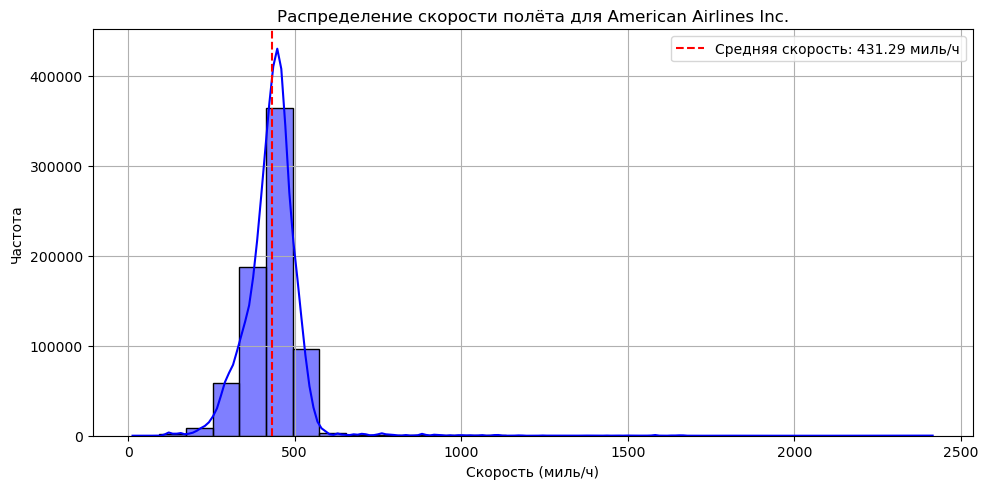

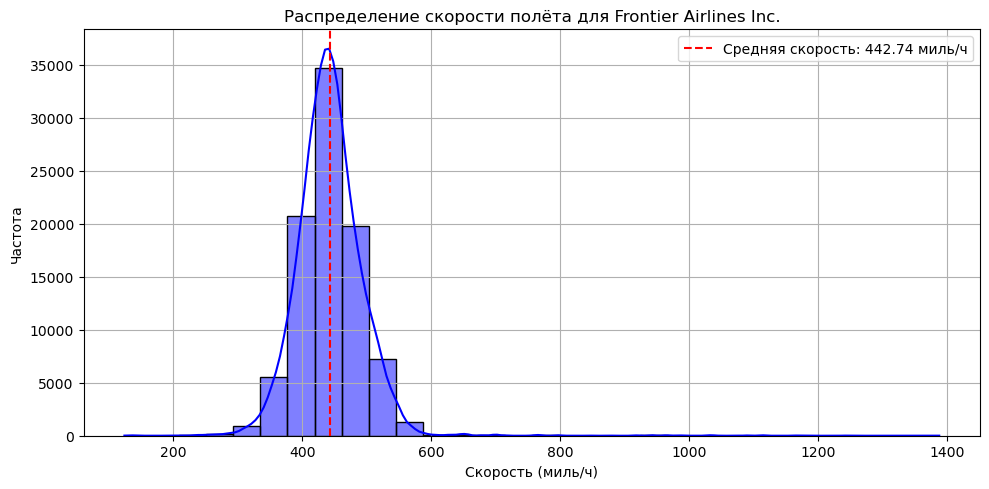

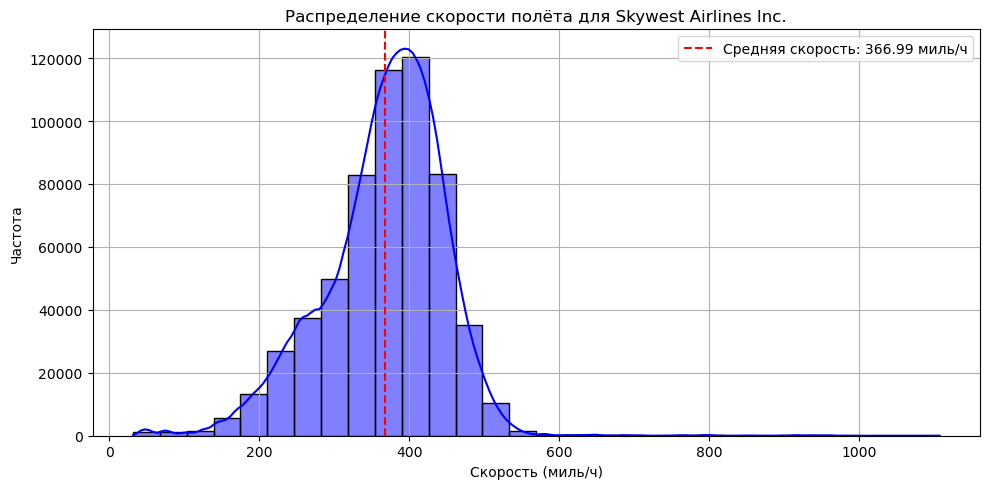

In [42]:
# копия DataFrame
df_speed = flights_df_cleaned.copy()

#удаляем нулевые или NaN значения AIR_TIME, чтобы не делить на 0
df_speed = df_speed[(df_speed['AIR_TIME'].notna()) & (df_speed['AIR_TIME'] > 0)]

df_speed['FLIGHT_SPEED'] = df_speed['DISTANCE'] / (df_speed['AIR_TIME'] / 60)

selected_airlines = ['American Airlines Inc.', 'Frontier Airlines Inc.', 'Skywest Airlines Inc.']

for airline in selected_airlines:
    airline_df = df_speed[df_speed['AIRLINE_y'] == airline]
    avg_speed = airline_df['FLIGHT_SPEED'].mean()

    plt.figure(figsize=(10, 5))
    sns.histplot(airline_df['FLIGHT_SPEED'], bins=30, kde=True, color='blue')
    plt.axvline(avg_speed, color='red', linestyle='--', label=f'Средняя скорость: {avg_speed:.2f} миль/ч')
    
    plt.title(f'Распределение скорости полёта для {airline}')
    plt.xlabel('Скорость (миль/ч)')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

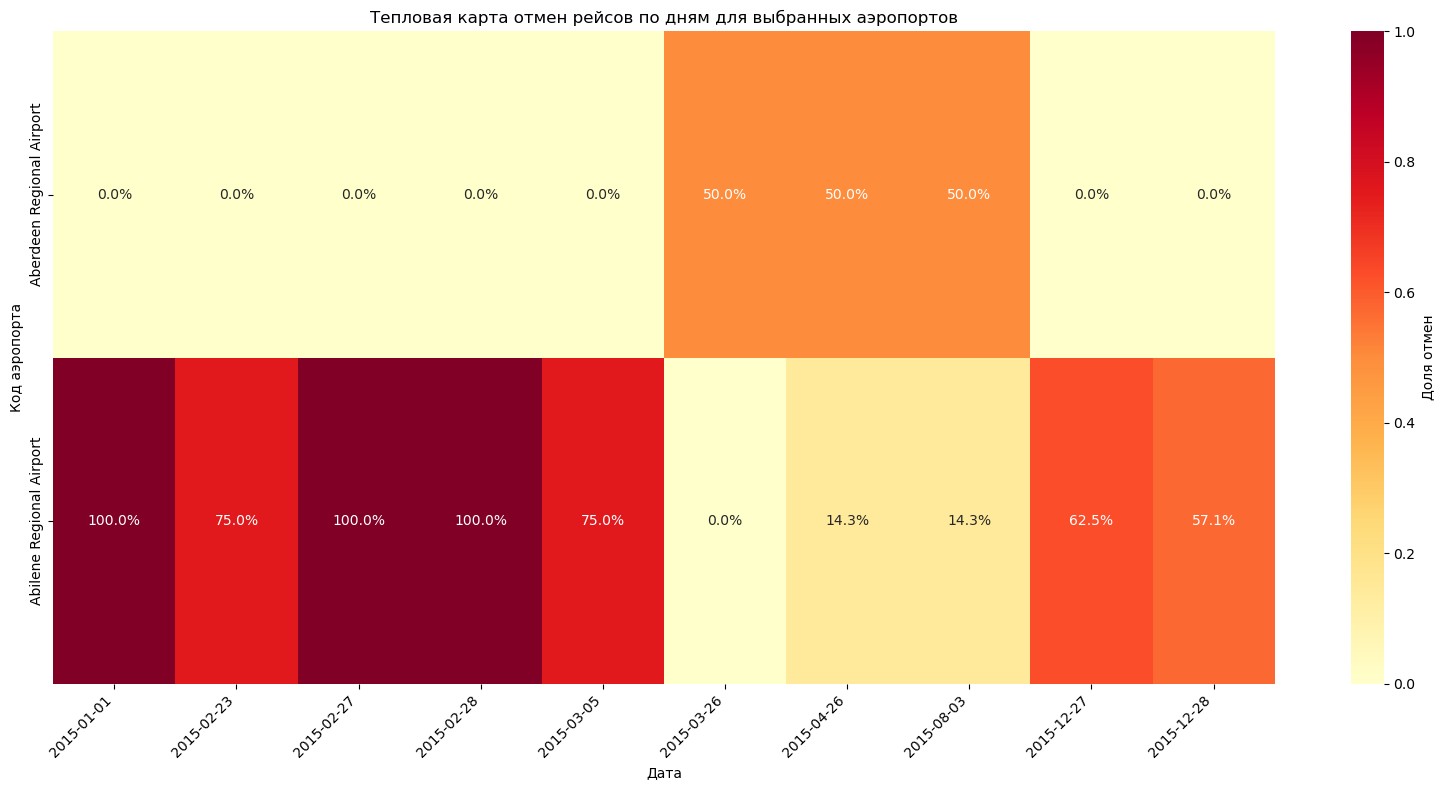

In [25]:
flights_df_cleaned['DATE'] = pd.to_datetime(flights_df_cleaned[['YEAR', 'MONTH', 'DAY']])
flights_df_cleaned['DATE'] = flights_df_cleaned['DATE'].dt.date

#считаем для каждого аэропорта количество уникальных дат
airport_date_counts = (flights_df_cleaned
                       .groupby('AIRPORT')['DATE']
                       .nunique()
                       .reset_index()
                       .rename(columns={'DATE': 'unique_dates'}))

#фильтруем аэропорты, у которых есть хотя бы 10 уникальных дат
airports_with_10_dates = airport_date_counts[airport_date_counts['unique_dates'] >= 10]['AIRPORT'].tolist()


#выбираем первые два аэропорта из списка
selected_airports = airports_with_10_dates[:2]

#фильтрация данных
df_filtered = flights_df_cleaned[flights_df_cleaned['AIRPORT'].isin(selected_airports)].copy()

#рассчитываем среднюю долю отмен для каждой даты и аэропорта
cancel_stats = df_filtered.groupby(['AIRPORT', 'DATE'])['CANCELLED'].mean().reset_index()

top_10_dates = (cancel_stats
                .groupby('DATE')['CANCELLED']
                .mean()
                .sort_values(ascending=False)
                .head(10)
                .index)

heatmap_data = cancel_stats[cancel_stats['DATE'].isin(top_10_dates)]

heatmap_pivot = heatmap_data.pivot(index='AIRPORT', columns='DATE', values='CANCELLED')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1%", cmap="YlOrRd", cbar_kws={'label': 'Доля отмен'})

plt.title('Тепловая карта отмен рейсов по дням для выбранных аэропортов')
plt.xlabel('Дата')
plt.ylabel('Код аэропорта')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
flights_df_cleaned['AIRLINE'] = flights_df_cleaned['AIRLINE_y']

airlines_delay_stats = flights_df_cleaned.groupby('AIRLINE').agg(
    avg_departure_delay=('DEPARTURE_DELAY', 'mean'),
    avg_arrival_delay=('ARRIVAL_DELAY', 'mean')
).reset_index()

print(airlines_delay_stats)

                         AIRLINE  avg_departure_delay  avg_arrival_delay
0           Alaska Airlines Inc.             1.772393          -1.001797
1         American Airlines Inc.             8.744908           3.299465
2   American Eagle Airlines Inc.             9.534633           5.841837
3    Atlantic Southeast Airlines             8.440850           6.236487
4           Delta Air Lines Inc.             7.329633           0.153556
5         Frontier Airlines Inc.            13.258587          12.360947
6         Hawaiian Airlines Inc.             0.480727           2.001822
7                JetBlue Airways            11.301553           6.458951
8          Skywest Airlines Inc.             7.646729           5.632943
9         Southwest Airlines Co.            10.425182           4.230445
10              Spirit Air Lines            15.650474          14.109168
11               US Airways Inc.             5.981768           3.509403
12         United Air Lines Inc.            14.2382

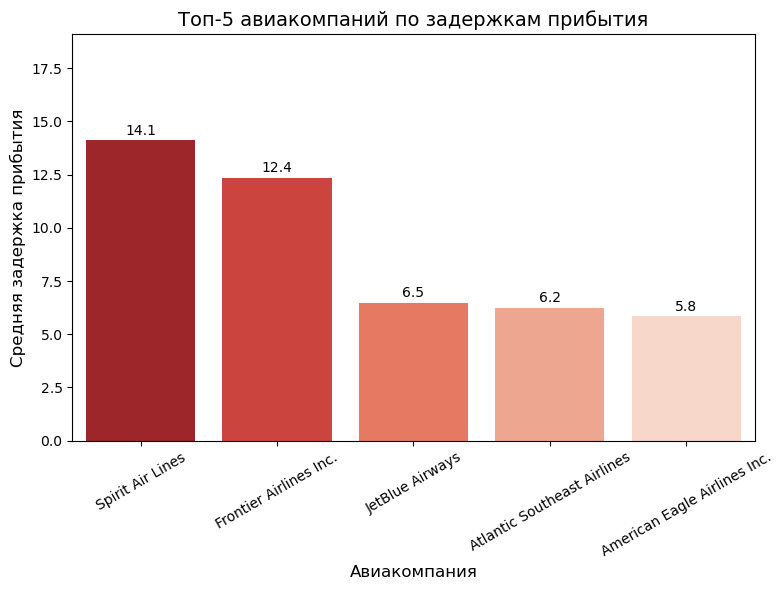

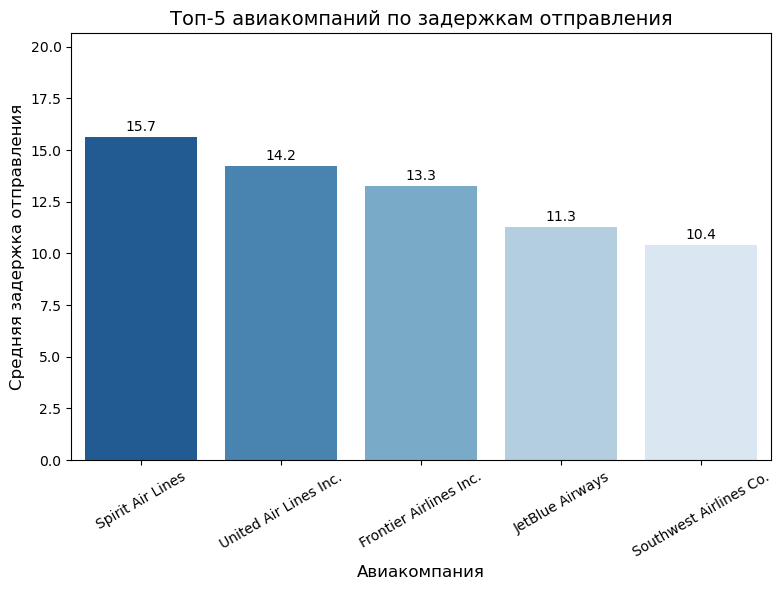

In [41]:
top5_arrival_delays = airlines_delay_stats.sort_values(by='avg_arrival_delay', ascending=False).head(5)
#построение графика для задержек прибытия
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='AIRLINE', 
    y='avg_arrival_delay', 
    data=top5_arrival_delays, 
    hue='AIRLINE', 
    palette='Reds_r', 
    legend=False
)
plt.title('Топ-5 авиакомпаний по задержкам прибытия', fontsize=14)
plt.xlabel('Авиакомпания', fontsize=12)
plt.ylabel('Средняя задержка прибытия', fontsize=12)
plt.ylim(0, top5_arrival_delays['avg_arrival_delay'].max() + 5) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=2)

plt.xticks(rotation=30) 
plt.tight_layout()
plt.show()

top5_departure_delays = airlines_delay_stats.sort_values(by='avg_departure_delay', ascending=False).head(5)
# построение графика для задержек отправления
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='AIRLINE', 
    y='avg_departure_delay', 
    data=top5_departure_delays, 
    hue='AIRLINE', 
    palette='Blues_r', 
    legend=False
)
plt.title('Топ-5 авиакомпаний по задержкам отправления', fontsize=14)
plt.xlabel('Авиакомпания', fontsize=12)
plt.ylabel('Средняя задержка отправления', fontsize=12)
plt.ylim(0, top5_departure_delays['avg_departure_delay'].max() + 5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=2)

plt.xticks(rotation=30) 
plt.tight_layout()
plt.show()

In [39]:
#добавляем новый столбец - сумма задержек отправления и прибытия
airlines_delay_stats['total_delay'] = airlines_delay_stats['avg_departure_delay'] + airlines_delay_stats['avg_arrival_delay']

#находим авиакомпанию с максимальной суммарной задержкой
max_delay_airline = airlines_delay_stats.loc[airlines_delay_stats['total_delay'].idxmax()]

# Выводим результат
print(f"Авиакомпания с наибольшими средними задержками: {max_delay_airline['AIRLINE']}")
print(f"Средняя задержка отправления: {max_delay_airline['avg_departure_delay']:.2f} минут")
print(f"Средняя задержка прибытия: {max_delay_airline['avg_arrival_delay']:.2f} минут")

Авиакомпания с наибольшими средними задержками: Spirit Air Lines
Средняя задержка отправления: 15.65 минут
Средняя задержка прибытия: 14.11 минут
